# 8 Integrals
References

My Calculus learning notebook following the live lesson series by Dr. Jon Krohn. I adapted some and partially modified or added entirely new code. Notes largely based on and from Jon's notebooks and learning materials. The lesson and original notebook source code at:

https://learning.oreilly.com/videos/calculus-for-machine/9780137398171/
https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/4-calculus-ii.ipynb

Key Concepts
- Integral Rules
    - Constant rule
    - Power rule
    - Constant product rule
    - Sum rule
    - Indefinite integral
    - Definite integral

## Basic setup

In [57]:
import numpy as np
import torch
import math # for constant pi
import matplotlib.pyplot as plt

import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('here')


# shows the image immediately. Resize option available
def show_img(path, resize=None):
  img = cv2.imread(path)
  if (resize != None):
    img = cv2.resize(img, dsize=(0,0), fx=resize, fy=resize)
  cv2_imshow(img)

# turns the path into an image object. Resize option available
def get_img(path, resize=None):
  img = cv2.imread(path)
  if (resize != None):
    img = cv2.resize(img, dsize=(0,0), fx=resize, fy=resize)
  return img

def cite_source(img, source, org=None, scale=None):
    if (org == None):
        img = cv2.putText(img, source, org=(int(np.ceil(img.shape[1]*0.1)), int(np.ceil(img.shape[0]*0.98))),
                          fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=scale, color=1)
    elif (org != None):
        if (type(org) == tuple):
            img = cv2.putText(img, source, org=org,
                                fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=scale, color=1)
    return img

# Code by Bill Grates on Stackoverflow
# https://stackoverflow.com/users/5629538/bill-grates
# https://stackoverflow.com/questions/32609098/how-to-fast-change-image-brightness-with-python-opencv

def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value
    
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

Drive already mounted at here; to attempt to forcibly remount, call drive.mount("here", force_remount=True).


## Study Note tools

### Display image/notes

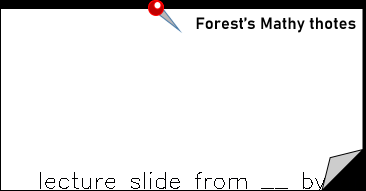

In [18]:
# display work
path = "/content/here/MyDrive/Math works/notes.png"
img = get_img(path, resize=0.5)
img = cite_source(img, "lecture slide from __ by dr. Jon Kron", scale=0.75)
#img = increase_brightness(img, value=75)
cv2_imshow(img)

## 8.1 Binary Classification 
- Supervised Learning
  - Goal: learn function that uses $x$ to approximate $y$.
  - Regression 
    - Examples (predicting a pattern): 
        - Clinical measures of forgetfulness
        - Sales of a product
        - Futur evalue of an asset
  - Classification
    - Multinomial
      - Handwritten digits: 10 classes
      - Imagenet: 21k classes (online repository of images)
    - Binomial
      - Movie-review sentiment: positive vs negative
      - Photos of animals: dog vs not a dog


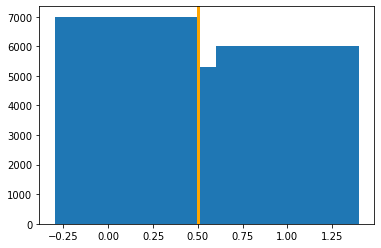

In [19]:
xs = np.arange(0.1, 1.1, 0.1)
ys = [7000, 3000, 1200, 1000, 900, 1100, 1300, 2800, 5300, 6000]

fig, ax = plt.subplots()
ax.bar(xs, ys)
x_min, x_max = ax.get_xlim()
ax.set_xlim(x_min, x_max)
ax.axvline(x=0.5, color='orange', linewidth=3)

Accuracy at a single threshold
Limitations
- Doesn't reflect model quality at other points in output distribution.
- Prediction of 0.51 is considered as correct as prediction of 0.99.
Solution: ROC AUC metric 
  - ROC (Receiver Operating Characteristic): a measure of the usefulness of a test in general, where a greater area means a more useful test, the areas under ROC curves are used to compare the usefulness of tests. 

## 8.2 The Confusion Matrix and ROC Curve


250 203


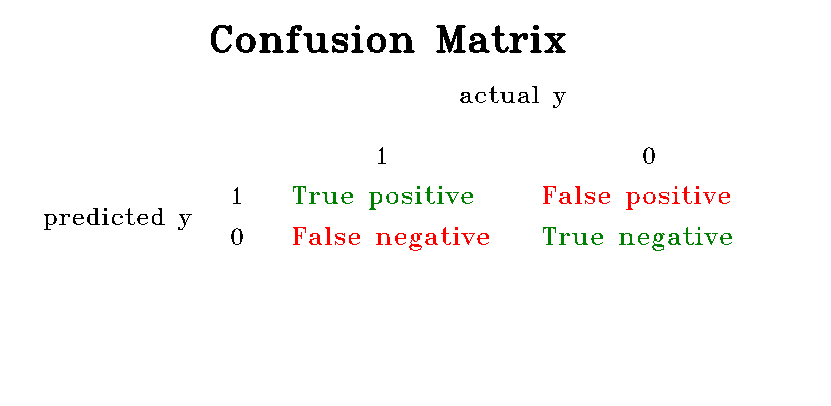

In [20]:
path = "/content/here/MyDrive/Math works/Notepad.png"
img = cv2.imread(path)

width, height = img.shape[1], img.shape[0]
print(int(np.ceil(width*0.3)), int(np.ceil(height*0.5)) )

results = ['True positive', 'False positive', 'False negative', 'True negative']
coordinates = [(0.35, 0.5), (0.65, 0.5), (0.35, 0.6), (0.65, 0.6)]
colors = [(0,128,0), (0,0,255), (0,0,255), (0,128,0)]

img = cv2.putText(img, "Confusion Matrix", 
                  org=(int(np.ceil(width*0.25)), int(np.ceil(height*0.125)) ), 
                  fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=1.2, color=1, thickness=2)

for i, result in enumerate(results):
    img = cv2.putText(img,
                      result, 
                      org=(int(np.ceil(width*coordinates[i][0])), int(np.ceil(height*coordinates[i][1])) ), 
                      fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=0.8,
                      color=colors[i])
    
labels = ['actual y', 'predicted y', "1                     0", '1', '0']
label_coors = [(0.55, 0.25), (0.05, 0.55), (0.45, 0.4), (0.275, 0.5), (0.275, 0.6)]

for i, label in enumerate(labels):
    img = cv2.putText(img, label, 
                        org=(int(np.ceil(width*label_coors[i][0])), int(np.ceil(height*label_coors[i][1])) ), 
                        fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=0.75, color=1)
cv2_imshow(img)

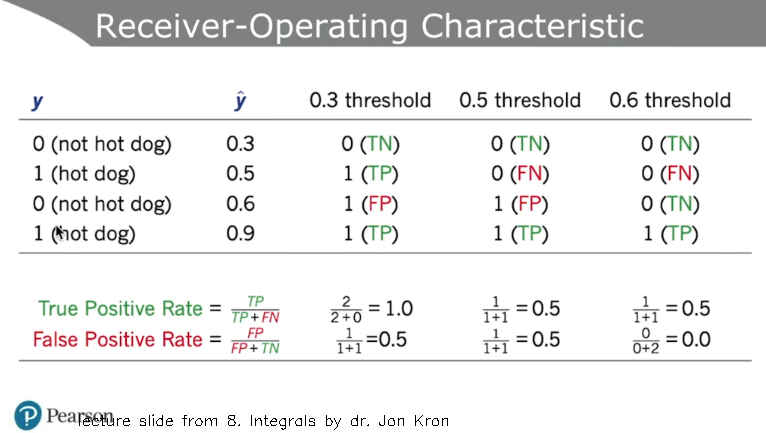

In [21]:
path = "/content/here/MyDrive/Math works/ROC.png"
img = get_img(path, resize=0.75)
img = cite_source(img, "lecture slide from 8. Integrals by dr. Jon Kron", scale=0.5)
#img = increase_brightness(img, value=75)
cv2_imshow(img)

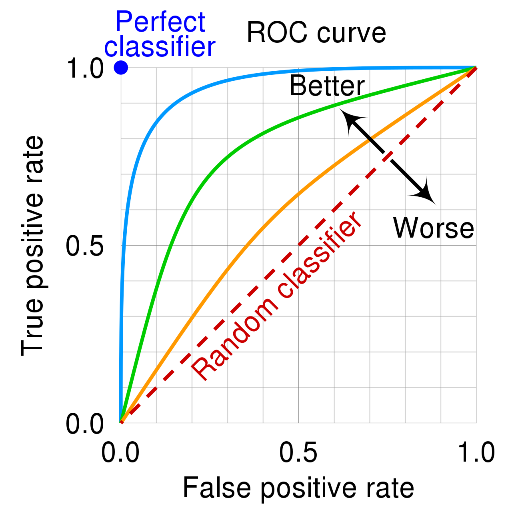

In [22]:
path = "/content/here/MyDrive/Math works/Roc_curve.svg.png"
img = show_img(path, resize=0.4)
#img = cite_source(img, "ROC curve graph from Wikipedia")
#cv2_imshow(img)

## 8.3 Indefinite Integrals 
Finding area under a curve is the most useful application of integrals in ML.
- ROC
- "Expectation" of random variable in probabiliity theory
- Integral is the integration of infinitesimally small areas under a curve.

<br/>

Notation
$$∫2x \delta x$$
- $2x$: function
- $\delta x$: the variable to integrate along



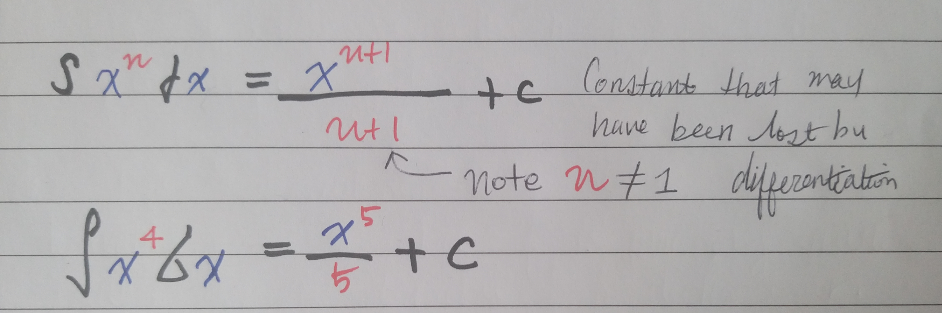

In [39]:
path = "/content/here/MyDrive/Math works/integral.jpg"
img = get_img(path, 0.5)
width, height = img.shape[1], img.shape[0]

img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
img = img[:int(np.ceil(width*0.65)), :int(np.ceil(height*0.95))]
img = cv2.resize(img, dsize=(0,0), fx=0.35, fy=0.35)
cv2_imshow(img)

Example
- Note that the coefficient of $x$ is handled separately from the variable $x$.

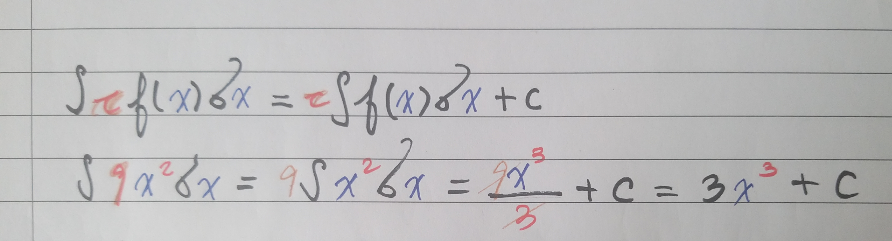

In [42]:
path = "/content/here/MyDrive/Math works/integral_example.jpg"
img = get_img(path, 0.5)
height, width = img.shape[1], img.shape[0]

img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
img = img[:int(np.ceil(height*0.5)), :int(np.ceil(width*0.9))]
img = cv2.resize(img, dsize=(0,0), fx=0.35, fy=0.35)
cv2_imshow(img)

### Sum Rule

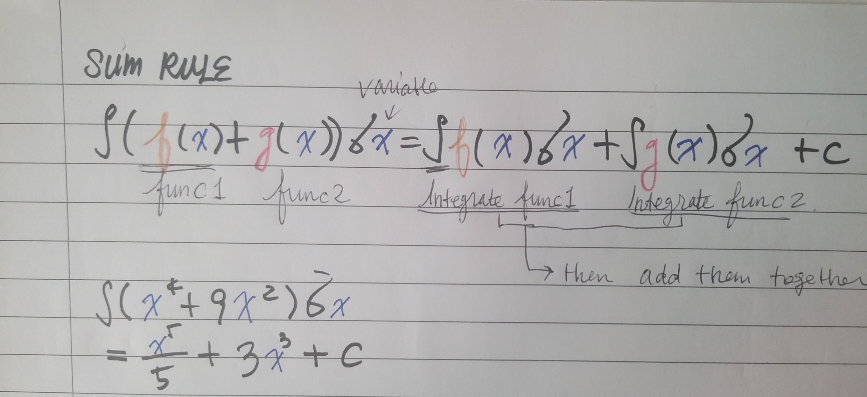

In [63]:
path = "/content/here/MyDrive/Math works/sum rule.jpg"
img = get_img(path, 0.5)
width, height = img.shape[1], img.shape[0]
img = img[:int(np.ceil(width*0.4)), :int(np.ceil(height*1.8))]
img = cv2.resize(img, dsize=(0,0), fx=0.35, fy=0.35)
increase_brightness(img, value=30)
cv2_imshow(img)

## 8.4 Definite Integrals
Get the area of a specified range (between $x1$ and $x2).


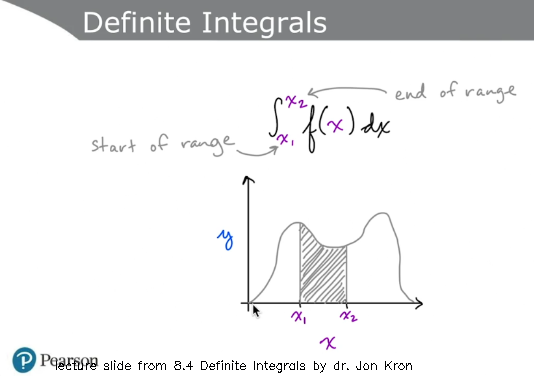

In [68]:
path = "/content/here/MyDrive/Math works/definite integral.png"
img = get_img(path, 0.65)
img = cite_source(img, "lecture slide from 8.4 Definite Integrals by dr. Jon Kron", scale=0.4)
cv2_imshow(img)

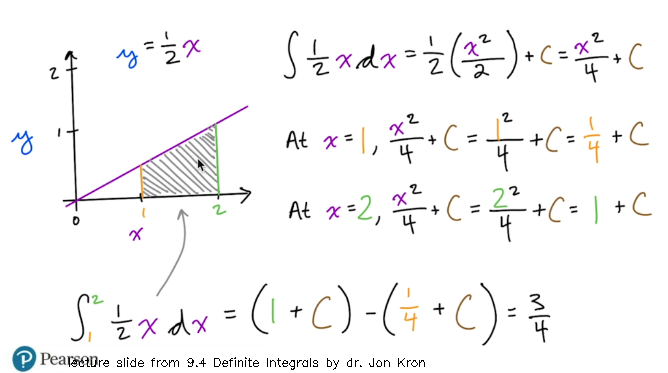

In [69]:
path = "/content/here/MyDrive/Math works/integral problem.png"
img = get_img(path, 0.65)
img = cite_source(img, "lecture slide from 9.4 Definite Integrals by dr. Jon Kron", scale=0.4)
cv2_imshow(img)

## 8.5 Numeric Integration with Python
Counterpart ofautomatic differentiation

$$\int_{1}^{2} \frac{x}{2}\delta x = \frac{3}{4}$$
 


In [71]:
# "quadrature" = numerical integration (as opposed to symbolic)
from scipy.integrate import quad

In [70]:
def g(x):
    return x/2

- 1st return value: integral
- 2nd return value: an estimate of the absolute error of the integral.


In [73]:
quad(g, 1, 2)

(0.75, 8.326672684688674e-15)

## 8.6 Exercises
 


### Problem 1

$$\int x^5 \delta x$$


In [78]:
import re
y = "x**5"

def get_exponent(y):
    func = str(y)
    pattern = "\*\*\d*"
    match = re.search(pattern, func).group()
    exponent = int(match[2:])
    return exponent

exponent = get_exponent(y)
exponent

5

In [ ]:
y = x ** (exponent+1) / (exponent+1)

### Problem 2
$$\int 12x^5 \delta x$$

In [79]:
y = "12*x**5"
exponent = get_exponent(y)
y = 12 * x ** (exponent+1) / (exponent+1) + C

5

### Problem 3
$$\int (12x^5 -x) \delta x$$

In [80]:
y = "12*x**5-x"
get_exponent(y)
y = 12*x**(exponent+1)/(exponent+1) - x**(2)/2 + C

5

### Problem 4

In [83]:
def func(x):
    return 2*x

quad(func, 3, 4)

(7.0, 7.771561172376096e-14)

## 8.7 Finding the Area Under the ROC Curve 

When we don't have a function but we do have $(x, y)$ coordinates, we can use the scikit-learn library's ```auc()``` method (Area Under the Curve), which uses a numerical approach ([the trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule) to find the area under the curve described by the coordinates:



In [84]:
from sklearn.metrics import auc

The $(x, y)$ coordinates of our hot dog-detecting ROC curve are:

- (0, 0)
- (0, 0.5)
- (0.5, 0.5)
- (0.5, 1)
- (1, 1)



In [85]:
xs = [0, 0,   0.5, 0.5, 1]
ys = [0, 0.5, 0.5, 1,   1]

In [86]:
auc(xs, ys)

0.75

## 8.8 Resources for Further Study of Calculus

- Differential Calculus
  - Chapter 6 of Deisenroth et al. (2020) [Mathematics for ML](https://mml-book.github.io/book/mml-book.pdf)
- Integral Calculus
  - Appendix 18.5 of Zhang et al's (2019) [Dive into Deep Learning](https://d2l.ai/chapter_introduction/index.html)

# Frequent Functions
- ```quad(func, start, end)```  
    - ```from scipy.integrate import quad```

- ```auc(xs, ys)```  
    - ```from sklearn.metrics import auc```